In [320]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

In [321]:
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
time=ctrl.Antecedent(np.arange(0, 31, 1), 'time')
hygiene=ctrl.Antecedent(np.arange(0, 6, 1), 'hygiene')
tip = ctrl.Consequent(np.arange(0, 30, 1), 'tip')


In [322]:
quality.automf(5)
service.automf(5)
time.automf(5)
hygiene.automf(5)


In [323]:
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 15])
tip['medium'] = fuzz.trimf(tip.universe, [0, 15, 30])
tip['high'] = fuzz.trimf(tip.universe, [15, 30, 30])


e:\projects\pythonproject\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


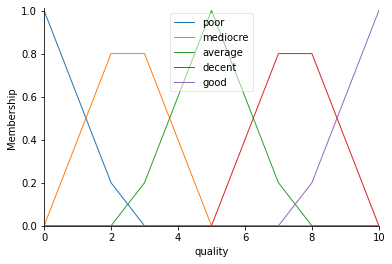

In [324]:
quality.view()

e:\projects\pythonproject\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


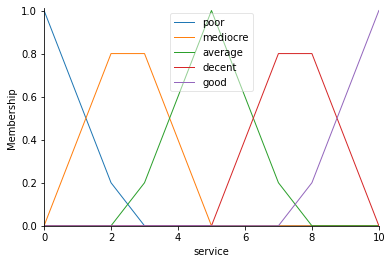

In [325]:
service.view()

e:\projects\pythonproject\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


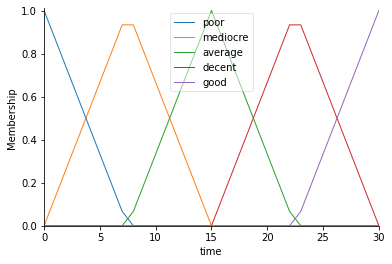

In [326]:
time.view()

e:\projects\pythonproject\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


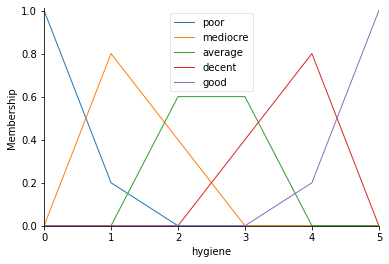

In [327]:
hygiene.view()

e:\projects\pythonproject\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


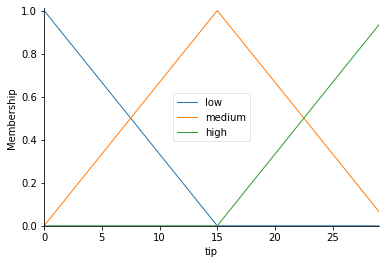

In [328]:
tip.view()


(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

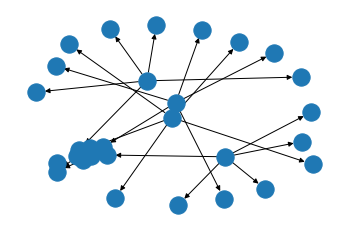

In [329]:
rule1 = ctrl.Rule(quality['poor'] | service['poor']|time['good']|hygiene['poor'], tip['low'])
rule1.view()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

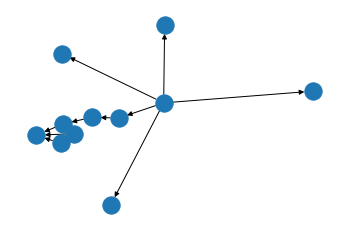

In [330]:
rule2 = ctrl.Rule(quality['average'] and time['decent'], tip['medium'])
rule2.view()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

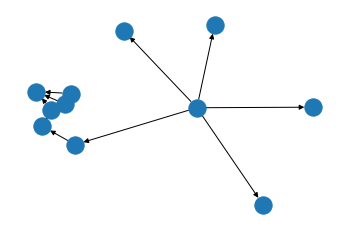

In [331]:
rule3 = ctrl.Rule(service['average'] and quality['average'], tip['medium'])
rule3.view()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

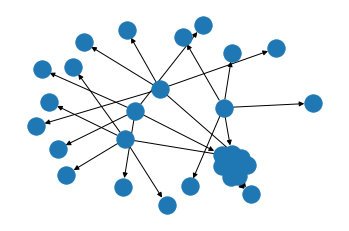

In [332]:
rule4= ctrl.Rule((service['good'] & hygiene['good']) |
                 (quality['good'] & time['poor']), tip['high'])
rule4.view()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

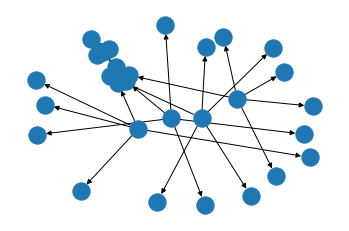

In [333]:
rule5=ctrl.Rule((service['decent'] & hygiene['mediocre']) | (quality['decent'] & time['decent']), tip['medium'])
rule5.view()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

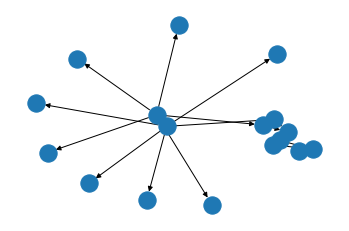

In [334]:
rule6=ctrl.Rule((service['good'] & quality['good']) , tip['high'])
rule6.view()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

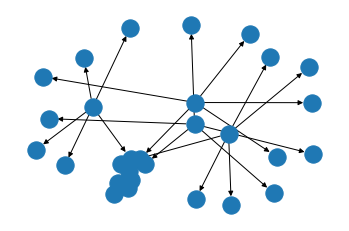

In [335]:
rule7=ctrl.Rule((service['good'] & time['decent'])|(quality['good'] & hygiene['mediocre']) , tip['medium'])
rule7.view()

In [336]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4,rule5,rule6,rule7])


In [337]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)


In [338]:
tipping.input['quality'] = 4
tipping.input['service'] = 8
tipping.input['time']=11
tipping.input['hygiene']=4

In [339]:
tipping.compute()
print (tipping.output['tip'])

15.102362204724415


e:\projects\pythonproject\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


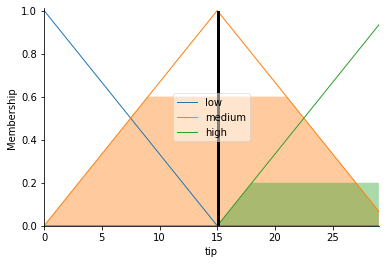

In [340]:
tip.view(sim=tipping)


In [341]:
tipping.input['quality'] = 1
tipping.input['service'] = 5.1
tipping.input['time']=15
tipping.input['hygiene']=4

In [342]:
tipping.compute()
print (tipping.output['tip'])

5.57142857142857


e:\projects\pythonproject\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


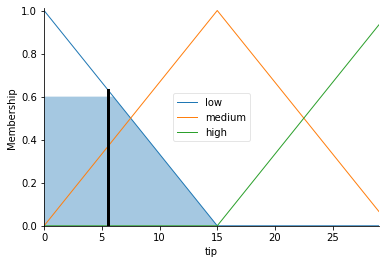

In [343]:
tip.view(sim=tipping)

In [344]:
tipping.input['quality'] = 8
tipping.input['service'] = 7.5
tipping.input['time']=5
tipping.input['hygiene']=4

In [345]:
tipping.compute()
print (tipping.output['tip'])

22.720000000000006


e:\projects\pythonproject\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


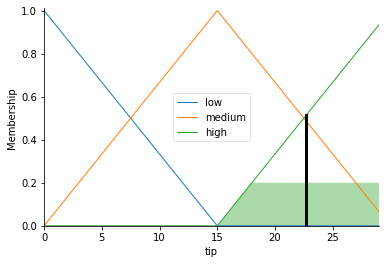

In [346]:
tip.view(sim=tipping)